### **Introduction**: 

* The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives,which the report also correlates with various life factors

* The rankings of national happiness are based on a Cantril ladder survey. Nationally representative samples of respondents are asked to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale. The report correlates the results with various life factors.

* In the reports, experts in fields including economics, psychology, survey analysis, and national statistics, describe how measurements of well-being can be used effectively to assess the progress of nations, and other topics. Each report is organized by chapters that delve deeper into issues relating to happiness, including mental illness, the objective benefits of happiness, the importance of ethics, policy implications, and links with the Organisation for Economic Co-operation and Development's (OECD) approach to measuring subjective well-being and other international and national efforts.

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------

<img src="https://allthatsinteresting.com/wordpress/wp-content/uploads/2016/03/giphy-4.gif" width="700px">

## Analyzing Happiness around the Globe.

In [1]:
!pip install bubbly

  Created wheel for bubbly: filename=bubbly-1.0.2-cp36-none-any.whl size=5428 sha256=2e45c7aaf7621db74d0dd2463a3a488f76db26a1963139cc832826c712e6387b
  Stored in directory: /root/.cache/pip/wheels/cf/3c/75/8c09dbf7cd6b320b69a6bc679fd111abd1139866c722b1476b
Successfully built bubbly


In [2]:
# for some basic operations
import numpy as np 
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
from bubbly.bubbly import bubbleplot

# for providing the path
import os
print(os.listdir("../input"))


['2017.csv', '2019.csv', '2015.csv', '2016.csv', '2018.csv']


In [3]:
data_2015 = pd.read_csv('../input/2015.csv')

data_2016 = pd.read_csv('../input/2016.csv')
data_2017 = pd.read_csv('../input/2017.csv')

data_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


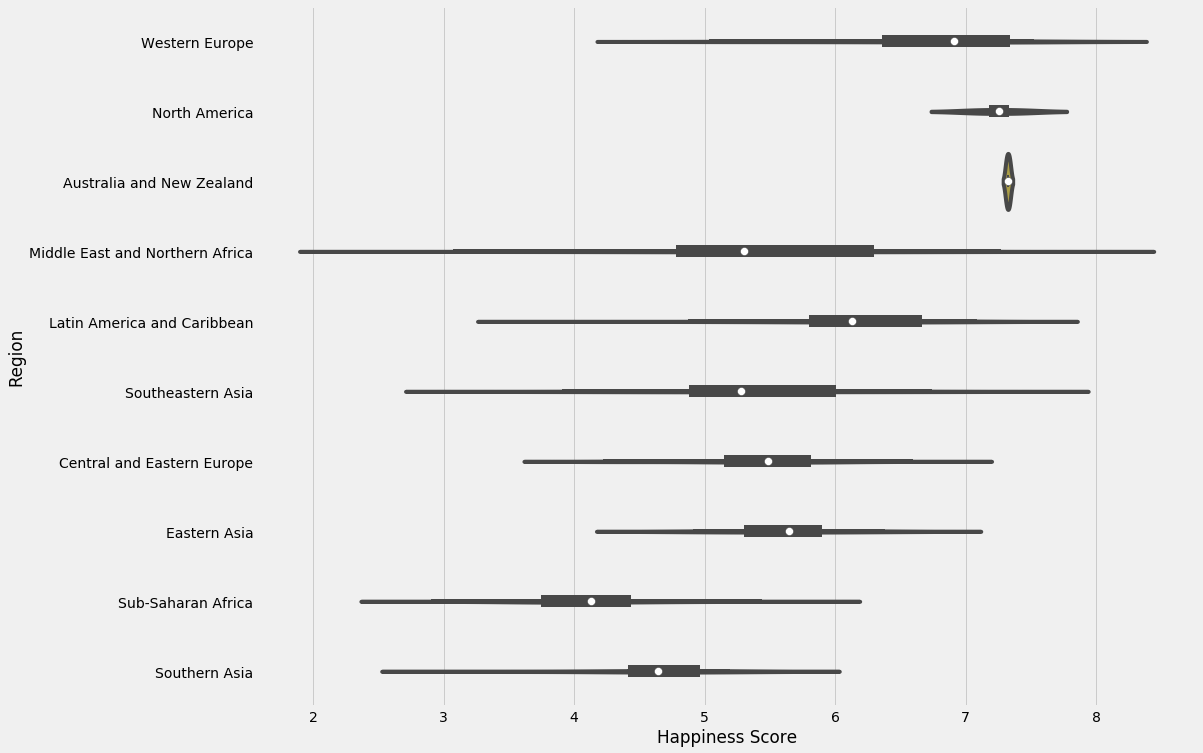

In [4]:
# happiness score vs continents

plt.rcParams['figure.figsize'] = (15, 12)
sns.violinplot(data_2016['Happiness Score'], data_2016['Region'])
plt.show()


### Correlations Between the Data

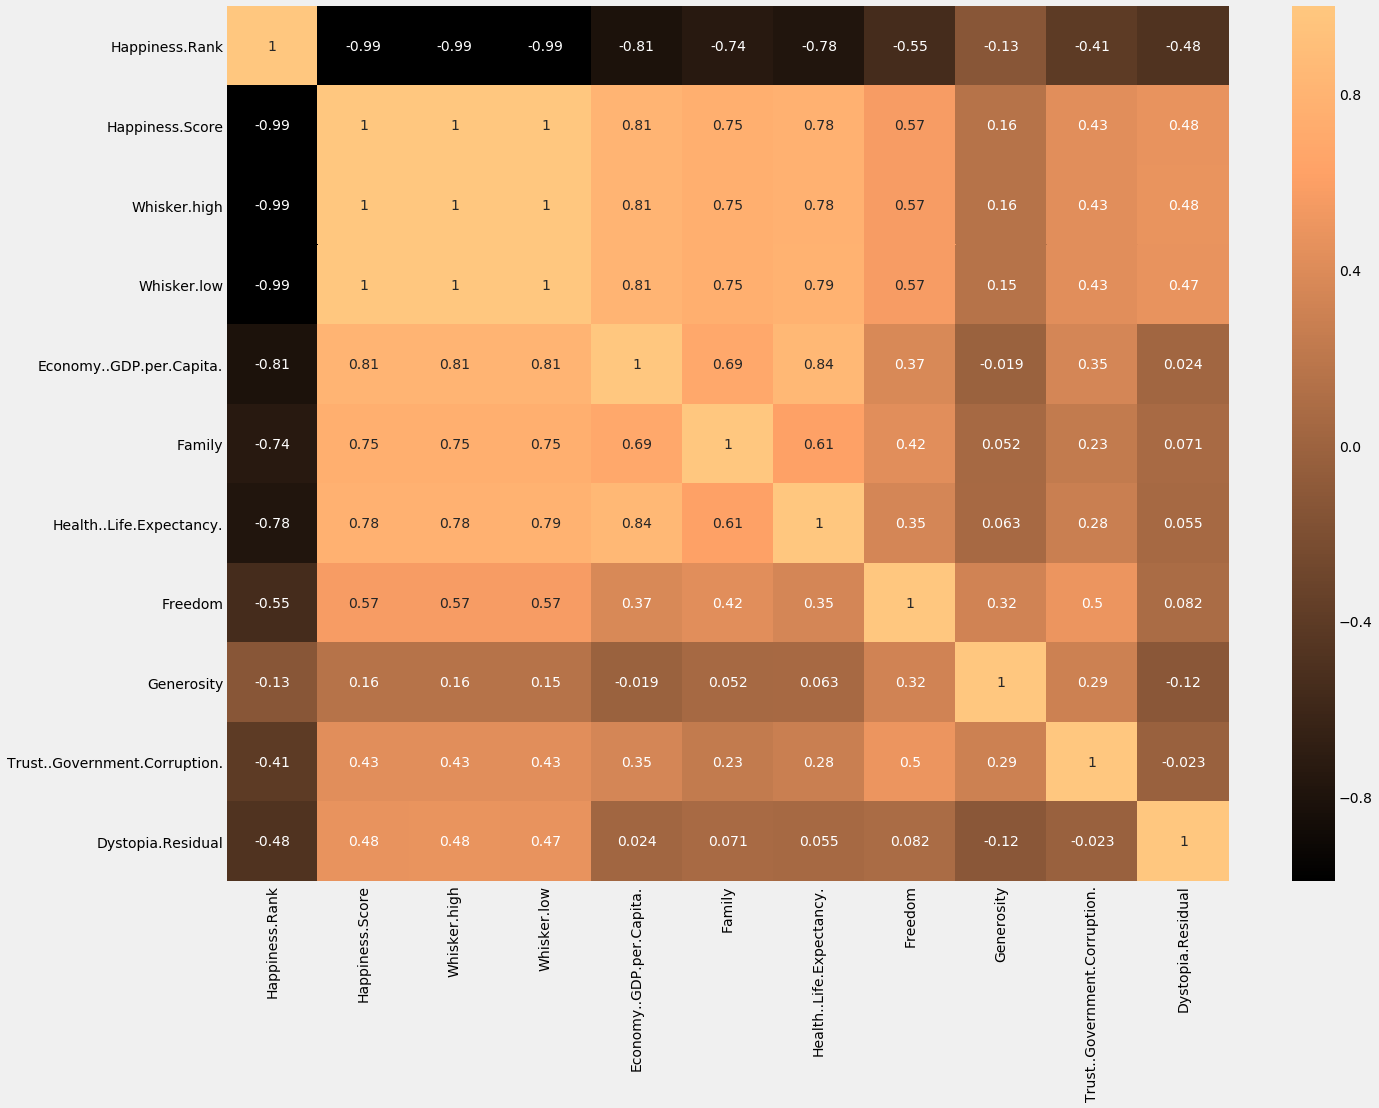

In [5]:
plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(data_2017.corr(), cmap = 'copper', annot = True)

plt.show()



> In the above Heat Map we can see that Happiness Score is very highly correlated with Economy, Health, and Family Satisfaction and somewhat related with Freedom also but has very low relation with Trust in Government in average case.

## Correlations for Western Europe

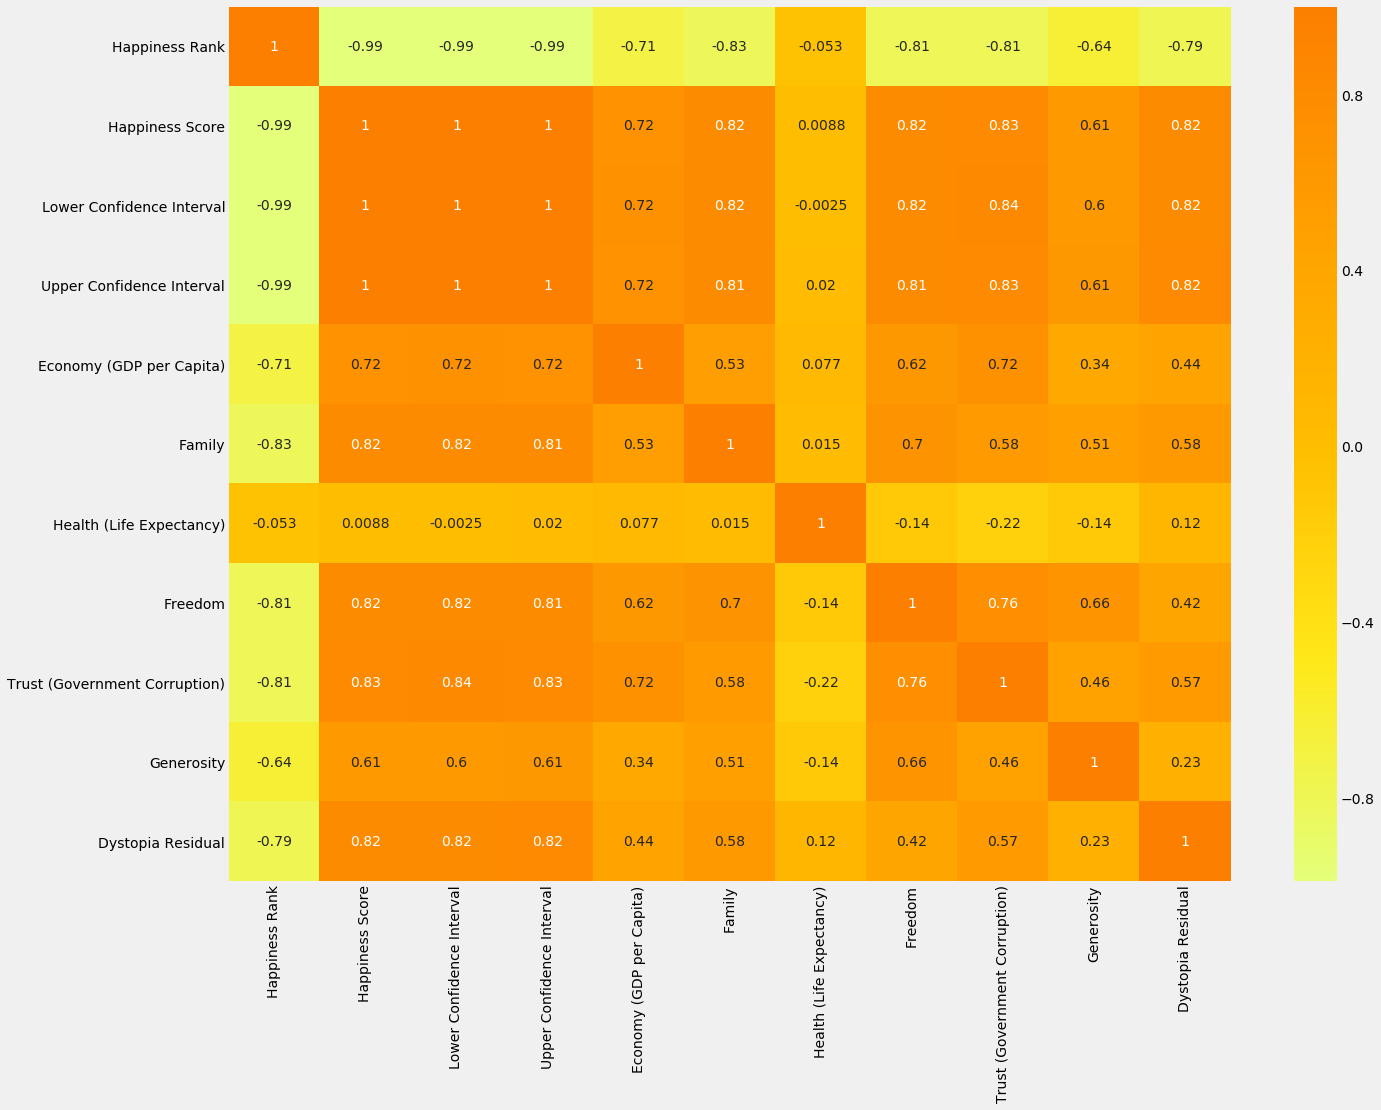

In [6]:
plt.rcParams['figure.figsize'] = (20, 15)

d = data_2016.loc[lambda data_2016: data_2016['Region'] == 'Western Europe']
sns.heatmap(d.corr(), cmap = 'Wistia', annot = True)

plt.show()



> The Heat Map particularly for Europe has one more thing to add apart from Family Satisfaction, Freedom, Economy, Generosity, It is also highly correlated with Trust in Government.

> The European Region is the Happiest Region so far.

## Correlations for Eastern Asia

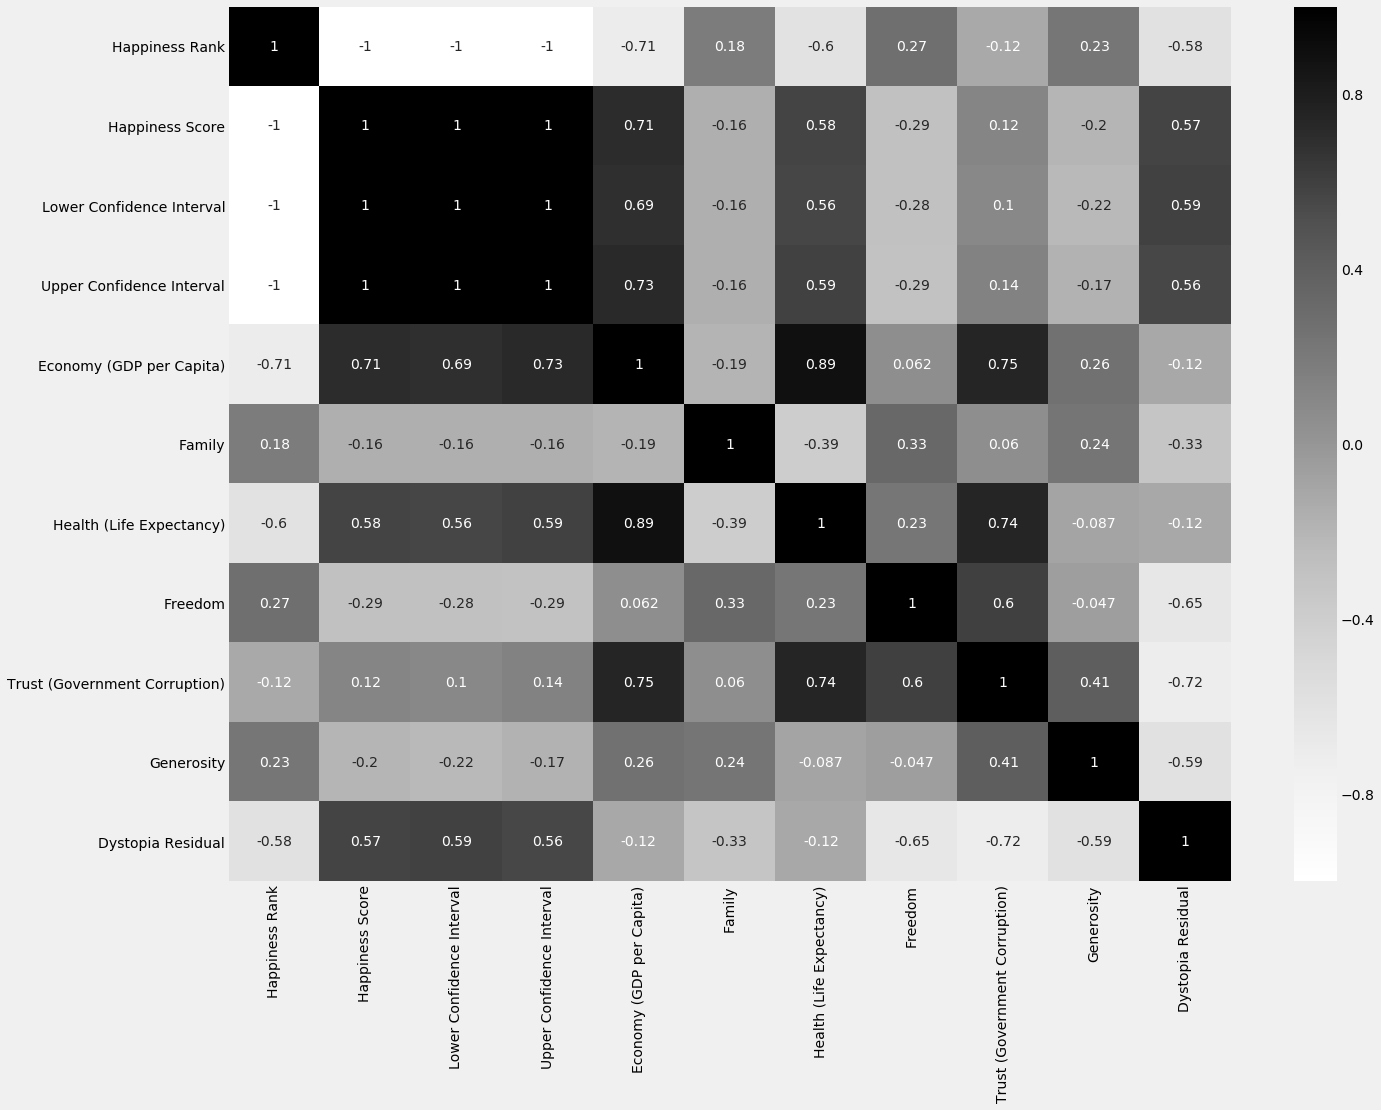

In [7]:
plt.rcParams['figure.figsize'] = (20, 15)

d = data_2016.loc[lambda data_2016: data_2016['Region'] == 'Eastern Asia']
sns.heatmap(d.corr(), cmap = 'Greys', annot = True)

plt.show()



> Here, The situation gets worsened as the Correlation is negative for many important factors such as Economy, Health, Trust in Government which makes the situation very critical. It has Positive correlations only with Freedom, Generosity and Famlily Satisfaction.

## North America

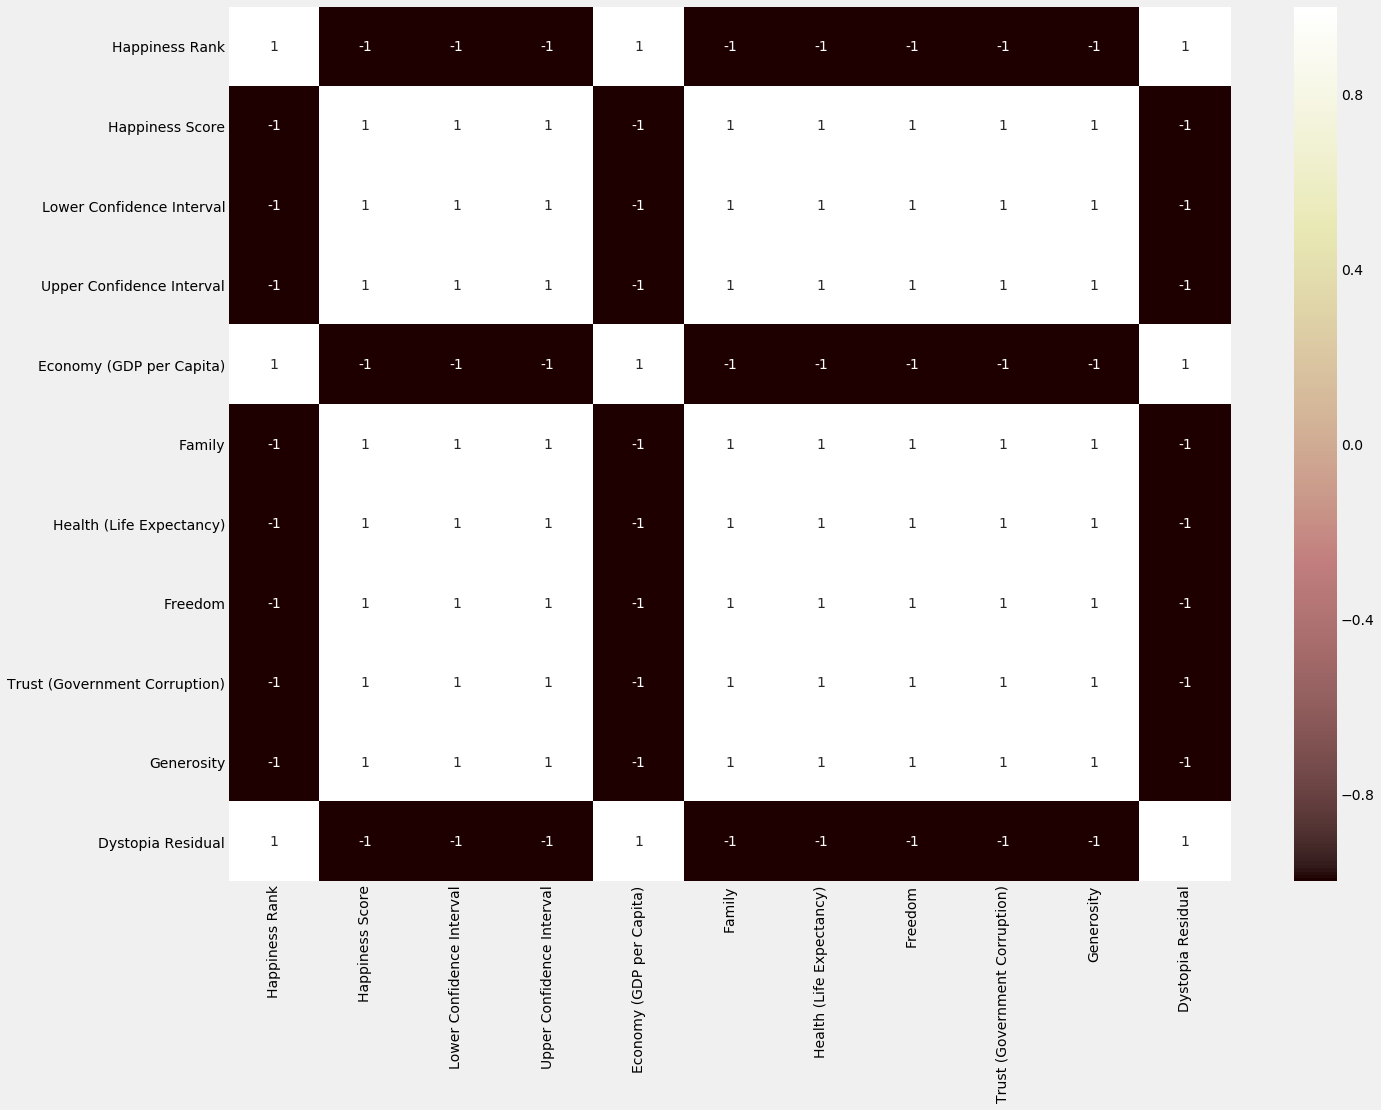

In [8]:
plt.rcParams['figure.figsize'] = (20, 15)

d = data_2016.loc[lambda data_2016: data_2016['Region'] == 'North America']
sns.heatmap(d.corr(), cmap = 'pink', annot = True)

plt.show()



> Everything is highly correlated to the Happiness in America. Amongst so many countries of the world. Being a very large country also America is still able to keep their people happy. America stands at position number 10 amongst the Happiness Rankings for the World.

## Middle East and Northern Africa

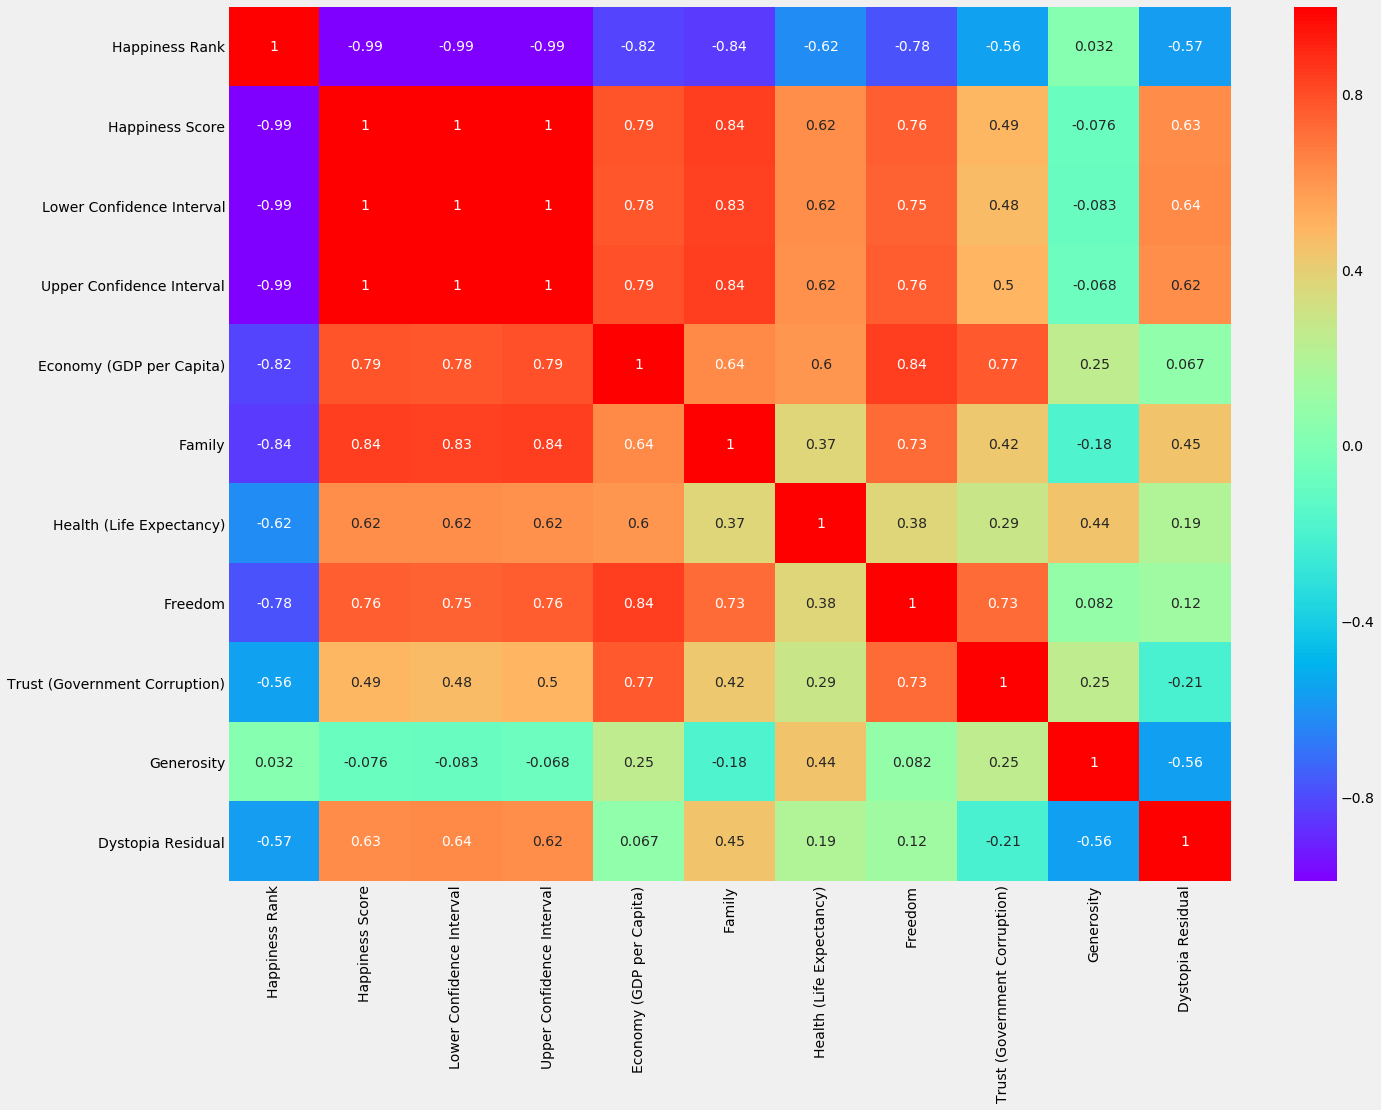

In [9]:
plt.rcParams['figure.figsize'] = (20, 15)

d = data_2016.loc[lambda data_2016: data_2016['Region'] == 'Middle East and Northern Africa']

sns.heatmap(d.corr(), cmap = 'rainbow', annot = True)

plt.show()



> The correlations are quite goood with almost all the important factors being highly correlated with Happiness. Family Satisfaction is the most important factor as it is the most important factor for happiness n this region.

## Sub-Saharan Africa

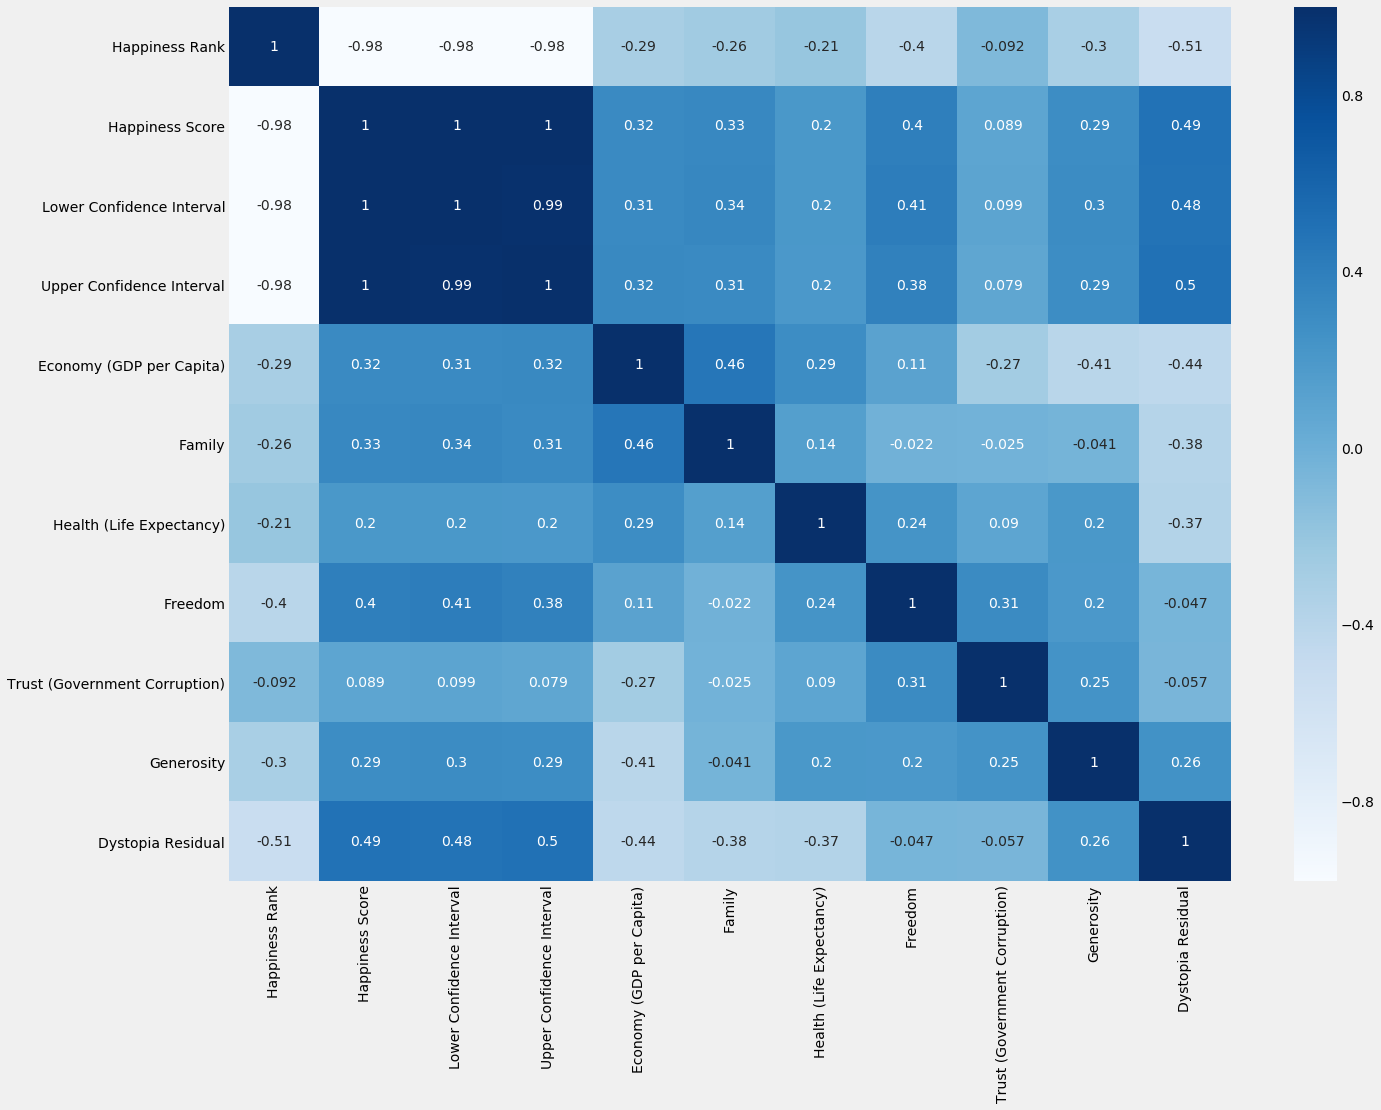

In [10]:

plt.rcParams['figure.figsize'] = (20, 15)

d = data_2016.loc[lambda data_2016: data_2016['Region'] == 'Sub-Saharan Africa']
sns.heatmap(d.corr(), cmap = 'Blues', annot = True)

plt.show()



> The Situations are very bad for Sub-Saharan Region as it is the unhappiest region in the world. The correlations with Happiness Score are very low for features such as Generosity, Family Satisfaction,  Freedom etc. Almost all of the features are having less than 0.5 correlation which is very bad.

## Bubble Charts

In [11]:
import warnings
warnings.filterwarnings('ignore')

figure = bubbleplot(dataset = data_2015, x_column = 'Happiness Score', y_column = 'Generosity', 
    bubble_column = 'Country', size_column = 'Economy (GDP per Capita)', color_column = 'Region', 
    x_title = "Happiness Score", y_title = "Generosity", title = 'Happiness vs Generosity vs Economy',
    x_logscale = False, scale_bubble = 1, height = 650)

py.iplot(figure, config={'scrollzoom': True})

In [12]:
import warnings
warnings.filterwarnings('ignore')

figure = bubbleplot(dataset = data_2015, x_column = 'Happiness Score', y_column = 'Trust (Government Corruption)', 
    bubble_column = 'Country', size_column = 'Economy (GDP per Capita)', color_column = 'Region', 
    x_title = "Happiness Score", y_title = "Trust", title = 'Happiness vs Trust vs Economy',
    x_logscale = False, scale_bubble = 1, height = 650)

py.iplot(figure, config={'scrollzoom': True})

In [13]:
import warnings
warnings.filterwarnings('ignore')

figure = bubbleplot(dataset = data_2016, x_column = 'Happiness Score', y_column = 'Health (Life Expectancy)', 
    bubble_column = 'Country', size_column = 'Economy (GDP per Capita)', color_column = 'Region', 
    x_title = "Happiness Score", y_title = "Health", title = 'Happiness vs Health vs Economy',
    x_logscale = False, scale_bubble = 1, height = 650)

py.iplot(figure, config={'scrollzoom': True})

In [14]:
import warnings
warnings.filterwarnings('ignore')

figure = bubbleplot(dataset = data_2015, x_column = 'Happiness Score', y_column = 'Family', 
    bubble_column = 'Country', size_column = 'Economy (GDP per Capita)', color_column = 'Region', 
    x_title = "Happiness Score", y_title = "Family", title = 'Happiness vs Family vs Economy',
    x_logscale = False, scale_bubble = 1, height = 650)

py.iplot(figure, config={'scrollzoom': True})

> Bubble plot to depict the relation between the Happiness Scores vs Family Satisfaction where size of the bubbles is represented by the Economy and the color of the bubbles is represented by the Different Regions of the World.

* It is Quite Visible that as the Family Satisfaction ratings increases the Happiness Score increases. So, We can say that they have a direct relationship between them.

* Also, European Countries and  Austrelia are the Happiest Regions. After America.

* There is not even a single country in American Region with low Happiness Index.

* Asian and African countries suffer with some serious issues, that is why none of the Asian orr African Country stands at a good position in terms of Happiness Index.

* Some Countries in Middle East are Happy while some are Unhappy.

In [15]:
import plotly.figure_factory as ff

data = (
  {"label": "Happiness", "sublabel":"score",
   "range": [5, 6, 8], "performance": [5.5, 6.5], "point": [7]},
  {"label": "Economy", "sublabel": "score", "range": [0, 1, 2],
   "performance": [1, 1.5], "sublabel":"score","point": [1.5]},
  {"label": "Family","sublabel":"score", "range": [0, 1, 2],
   "performance": [1, 1.5],"sublabel":"score", "point": [1.3]},
  {"label": "Freedom","sublabel":"score", "range": [0, 0.3, 0.6],
   "performance": [0.3, 0.4],"sublabel":"score", "point": [0.5]},
  {"label": "Trust", "sublabel":"score","range": [0, 0.2, 0.5],
   "performance": [0.3, 0.4], "point": [0.4]}
)



fig = ff.create_bullet(
    data, titles='label', subtitles='sublabel', markers='point',
    measures='performance', ranges='range', orientation='v',
)
py.iplot(fig, filename='bullet chart from dict')

> Bullet Chart to Represent the Range for some of the most Important Attributes given in the data. We have taken Happiness, Economy, Freedom, and Family. for analysis of their range.

* If the values for the given attributes lie in the Dark Blue Region then it is in the critical region.

* If the values for the given attributes lie in the light blue region then is is in good condition.

* If the values for the given attributes lie above or near the diamond then is in the best state or condition.

* White Regions are depicting the Maxima that could be achieved.

In [16]:
d2015 = data_2015['Region'].value_counts()

label_d2015 = d2015.index
size_d2015 = d2015.values


colors = ['aqua', 'gold', 'yellow', 'crimson', 'magenta']

trace = go.Pie(
         labels = label_d2015, values = size_d2015, marker = dict(colors = colors), name = '2015', hole = 0.3)

data = [trace]

layout1 = go.Layout(
           title = 'Regions')

fig = go.Figure(data = data, layout = layout1)
py.iplot(fig)



> The Above pie chart depicts the Number of Countries from each Region, 

* There are only two countries from North America(USA and Canada), and Austrelia(Austrelia, and New Zealand) Regions.

* The highest number of countries are from Sub-Saharan and Central and Eastern Europe Regions with 40 and 29 countries respectively.


In [17]:
trace1 = [go.Choropleth(
               colorscale = 'Earth',
               locationmode = 'country names',
               locations = data_2017['Country'],
               text = data_2017['Country'], 
               z = data_2017['Generosity'],
               )]

layout = dict(title = 'Generosity',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))


projections = [ "equirectangular", "mercator", "orthographic", "natural earth","kavrayskiy7", 
               "miller", "robinson", "eckert4", "azimuthal equal area","azimuthal equidistant", 
               "conic equal area", "conic conformal", "conic equidistant", "gnomonic", "stereographic", 
               "mollweide", "hammer", "transverse mercator", "albers usa", "winkel tripel" ]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]
annot = list([ dict( x=0.1, y=0.8, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])


# Update Layout Object

layout[ 'updatemenus' ] = list([ dict( x=0.1, y=0.8, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)
py.iplot(fig)



* Generosity is really low in Big Countries like Russia, China, and India but USA, Austrelia, and Canada has high ratings for generosity.

* Africa and South America have very low Generosity Scores in general.

## Top 10 Most Generous Countries

In [18]:
data_2017[['Country', 'Generosity']].sort_values(by = 'Generosity',
                                                ascending = False).head(10)

,Country,Generosity
113,Myanmar,0.838075
80,Indonesia,0.611705
26,Malta,0.574731
31,Thailand,0.572123
7,New Zealand,0.500005
151,Syria,0.493664
18,United Kingdom,0.492774
119,Sri Lanka,0.490864
144,Haiti,0.489204
9,Australia,0.477699


In [19]:
trace1 = [go.Choropleth(
               colorscale = 'Cividis',
               locationmode = 'country names',
               locations = data_2017['Country'],
               text = data_2017['Country'], 
               z = data_2017['Trust..Government.Corruption.'],
               )]

layout = dict(title = 'Trust in Governance',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))


projections = [ "equirectangular", "mercator", "orthographic", "natural earth","kavrayskiy7", 
               "miller", "robinson", "eckert4", "azimuthal equal area","azimuthal equidistant", 
               "conic equal area", "conic conformal", "conic equidistant", "gnomonic", "stereographic", 
               "mollweide", "hammer", "transverse mercator", "albers usa", "winkel tripel" ]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]
annot = list([ dict( x=0.1, y=0.8, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])


# Update Layout Object

layout[ 'updatemenus' ] = list([ dict( x=0.1, y=0.8, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)
py.iplot(fig)




* Looks like there is no trust in government all round the world, except Norway, sweden, and Finland.

* Canada Saudi Arabia, Germany, United Kingdom, Somalia, Ireland, and Austrlia are also having good trust in the Governance of their Countries.

## Top 10 Countries with Trust in Government

In [20]:
data_2017[['Country', 'Trust..Government.Corruption.']].sort_values(by = 'Trust..Government.Corruption.',
                                                                     ascending = False).head(10)

,Country,Trust..Government.Corruption.
25,Singapore,0.464308
150,Rwanda,0.455220
34,Qatar,0.439299
1,Denmark,0.400770
8,Sweden,0.384399
7,New Zealand,0.382817
4,Finland,0.382612
3,Switzerland,0.367007
20,United Arab Emirates,0.324490
17,Luxembourg,0.318834


In [21]:
trace1 = [go.Choropleth(
               colorscale = 'Portland',
               locationmode = 'country names',
               locations = data_2017['Country'],
               text = data_2017['Country'], 
               z = data_2017['Family'],
               )]

layout = dict(title = 'Family Satisfaction Index',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))


projections = [ "equirectangular", "mercator", "orthographic", "natural earth","kavrayskiy7", 
               "miller", "robinson", "eckert4", "azimuthal equal area","azimuthal equidistant", 
               "conic equal area", "conic conformal", "conic equidistant", "gnomonic", "stereographic", 
               "mollweide", "hammer", "transverse mercator", "albers usa", "winkel tripel" ]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]
annot = list([ dict( x=0.1, y=0.8, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])


# Update Layout Object

layout[ 'updatemenus' ] = list([ dict( x=0.1, y=0.8, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)
py.iplot(fig)




* India and China have very low Family Satisfaction comparatively. 

* All over the world Family Satisfaction rate is really good.

* Central African Republic has the lowest Family Satisfaction score in the world.

## Top 10 Countries in Family Satisfaction

In [22]:
data_2017[['Country', 'Family']].sort_values(by = 'Family', ascending = False).head(10)


,Country,Family
2,Iceland,1.610574
14,Ireland,1.558231
1,Denmark,1.551122
46,Uzbekistan,1.548969
7,New Zealand,1.548195
4,Finland,1.540247
0,Norway,1.533524
33,Spain,1.532091
3,Switzerland,1.516912
9,Australia,1.510042


In [23]:
trace1 = [go.Choropleth(
               colorscale = 'Viridis',
               locationmode = 'country names',
               locations = data_2017['Country'],
               text = data_2017['Country'], 
               z = data_2017['Economy..GDP.per.Capita.'],
               )]

layout = dict(title = 'GDP in 2017',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))


projections = [ "equirectangular", "mercator", "orthographic", "natural earth","kavrayskiy7", 
               "miller", "robinson", "eckert4", "azimuthal equal area","azimuthal equidistant", 
               "conic equal area", "conic conformal", "conic equidistant", "gnomonic", "stereographic", 
               "mollweide", "hammer", "transverse mercator", "albers usa", "winkel tripel" ]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]
annot = list([ dict( x=0.1, y=0.8, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])


# Update Layout Object

layout[ 'updatemenus' ] = list([ dict( x=0.1, y=0.8, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)
py.iplot(fig)




* America, Canada, Austrelia, Saudi Arabia, European Countries are the Leaders in the Economy and GDP. 

* Smaller Countries like Norway, Qatar, Luxembourg are having the best GDP rate in the world.

* Most of the African Countries are having very low GDP rate.

* India, Pakistan, Myanmar are having very low GDP in the Asian Regions.

## Top 10 Countries with Best Economy

In [24]:

data_2017[['Country', 'Economy..GDP.per.Capita.']].sort_values(by = 'Economy..GDP.per.Capita.',
            ascending = False).head(10)


,Country,Economy..GDP.per.Capita.
34,Qatar,1.870766
17,Luxembourg,1.741944
25,Singapore,1.692278
38,Kuwait,1.632952
20,United Arab Emirates,1.626343
0,Norway,1.616463
3,Switzerland,1.564980
70,"Hong Kong S.A.R., China",1.551675
13,United States,1.546259
14,Ireland,1.535707


In [25]:

trace1 = [go.Choropleth(
               colorscale = 'Picnic',
               locationmode = 'country names',
               locations = data_2017['Country'],
               text = data_2017['Country'], 
               z = data_2017['Freedom'],
               )]

layout = dict(title = 'Freedom Index',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))


projections = [ "equirectangular", "mercator", "orthographic", "natural earth","kavrayskiy7", 
               "miller", "robinson", "eckert4", "azimuthal equal area","azimuthal equidistant", 
               "conic equal area", "conic conformal", "conic equidistant", "gnomonic", "stereographic", 
               "mollweide", "hammer", "transverse mercator", "albers usa", "winkel tripel" ]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]
annot = list([ dict( x=0.1, y=0.8, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])


# Update Layout Object

layout[ 'updatemenus' ] = list([ dict( x=0.1, y=0.8, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)
py.iplot(fig)


* Looks like Canada, Austrelia and Europe are the best places on Earth to live. They have high scores throughout. In this case also They are the Winners.

* Europe on Whole has a very high Freedom Index in comparison to other Coutries of the World.

* African Countries such as Sudan and Angola are having the lowsest Freedom Index in the World.

## Top 10 Most Freedom Oriented Countries

In [26]:

data_2017[['Country', 'Freedom']].sort_values(by = 'Freedom', ascending = False).head(10)


,Country,Freedom
46,Uzbekistan,0.658249
0,Norway,0.635423
128,Cambodia,0.633376
2,Iceland,0.627163
1,Denmark,0.626007
3,Switzerland,0.620071
4,Finland,0.617951
7,New Zealand,0.614062
8,Sweden,0.612924
6,Canada,0.611101


In [27]:
trace1 = [go.Choropleth(
               colorscale = 'Electric',
               locationmode = 'country names',
               locations = data_2015['Country'],
               text = data_2015['Country'], 
               z = data_2015['Happiness Rank'],
               )]

layout = dict(title = 'Happiness Rank',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))


projections = [ "equirectangular", "mercator", "orthographic", "natural earth","kavrayskiy7", 
               "miller", "robinson", "eckert4", "azimuthal equal area","azimuthal equidistant", 
               "conic equal area", "conic conformal", "conic equidistant", "gnomonic", "stereographic", 
               "mollweide", "hammer", "transverse mercator", "albers usa", "winkel tripel" ]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]

annot = list([ dict( x=0.1, y=0.8, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])


# Update Layout Object

layout[ 'updatemenus' ] = list([ dict( x=0.1, y=0.8, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)
py.iplot(fig)


## Top 10 Happiest Countries

In [28]:

data_2017[['Country','Happiness.Rank']].head(10)


,Country,Happiness.Rank
0,Norway,1
1,Denmark,2
2,Iceland,3
3,Switzerland,4
4,Finland,5
5,Netherlands,6
6,Canada,7
7,New Zealand,8
8,Sweden,9
9,Australia,10


<img src="https://media.giphy.com/media/g3bKgbTctP1kI/giphy.gif" width="400px">